In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import FeatureHasher

In [2]:
hasher_dict = FeatureHasher(n_features=5, input_type='dict')

In [8]:
random_dict = hasher_dict.fit_transform([{'a': 1, 'b': 2},
                                            {'a': 0, 'c': 5},])

In [9]:
random_dict

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [10]:
random_dict.shape

(2, 5)

In [11]:
random_dict.toarray()

array([[ 1., -2.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0.]])

In [12]:
hasher_pair = FeatureHasher(n_features=5, input_type='pair')
random_pair = hasher_pair.fit_transform([[('a', 1), ('b', 2)],
                                            [('a', 0), ('c', 5)]])
random_pair.toarray()

array([[ 1., -2.,  0.,  0.,  0.],
       [ 0.,  0., -5.,  0.,  0.]])

In [14]:
text = [
    'I like to eat apple',
    'I like to eat apple and banana',
    'lorem ipsum dolor sit amet',
    'Better late than never',
]

In [15]:
hasher = FeatureHasher(n_features=8, input_type='string')

In [16]:
hashed_features = hasher.fit_transform(text)

In [17]:
hashed_features.shape

(4, 8)

In [19]:
hashed_features.toarray()

array([[ 4.,  0.,  3., -1.,  2., -1., -2.,  2.],
       [ 6.,  0.,  7.,  0., -1., -2., -2.,  2.],
       [ 5.,  2.,  1.,  2.,  5., -2., -1.,  0.],
       [ 3.,  2.,  2., -5., -1., -1., -1.,  5.]])

In [20]:
ozone = pd.read_csv('data/ozone_reading.csv')
ozone.head()

,Month,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility
0,January,5,5.34,5760,3,51,57.02,60
1,January,6,5.77,5720,4,69,53.78,60
2,January,7,3.69,5790,6,19,54.14,100
3,January,8,3.89,5790,3,25,64.76,250
4,January,9,5.76,5700,3,73,52.52,120


In [21]:
ozone.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

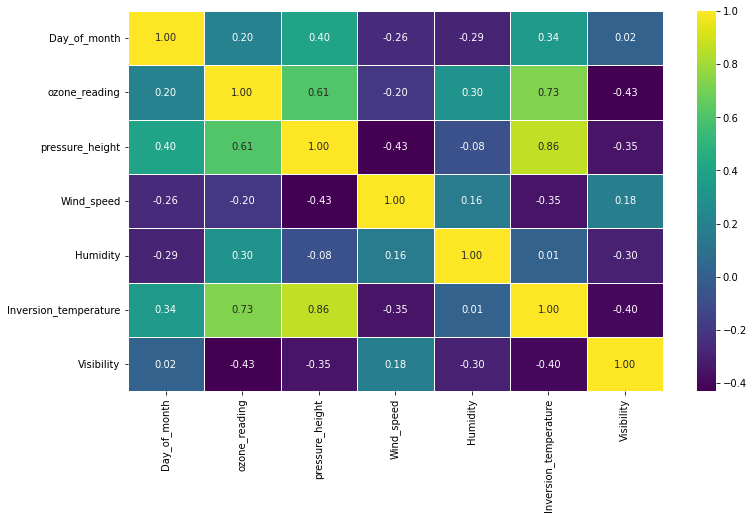

In [24]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(ozone.corr(), annot=True, linewidths=.5, fmt='.2f', ax=ax, cmap='viridis');

In [25]:
fh = FeatureHasher(n_features=4, input_type='string')
hashed_features = fh.fit_transform(ozone.Month).toarray()
hashed_categories = ['month_hash_0', 'month_hash_1', 'month_hash_2', 'month_hash_3']

In [27]:
hashed_df = pd.DataFrame(hashed_features, columns=hashed_categories, dtype=np.int8)
hashed_df.sample(10)

,month_hash_0,month_hash_1,month_hash_2,month_hash_3
7,0,1,3,1
59,1,0,0,0
39,0,-1,2,0
36,0,-1,2,0
60,1,0,0,0
58,1,0,0,0
93,0,0,0,2
102,0,0,0,2
57,1,0,0,0
61,1,0,0,0


In [29]:
hashed_ozone = pd.concat([ozone, hashed_df], axis=1)
hashed_ozone.drop(columns=['Month'], inplace=True)
hashed_ozone.sample(10)

,Day_of_month,ozone_reading,pressure_height,Wind_speed,Humidity,Inversion_temperature,Visibility,month_hash_0,month_hash_1,month_hash_2,month_hash_3
23,10,4.08,5560,10,72,37.58,300,1,1,1,1
22,9,2.92,5490,11,72,38.12,350,1,1,1,1
84,25,8.68,5730,5,71,59.36,200,0,0,3,0
34,1,2.26,5550,10,74,40.10,80,0,-1,2,0
65,15,2.88,5620,5,73,31.28,100,1,0,0,0
31,25,10.27,5720,6,63,59.18,150,1,1,1,1
52,29,8.60,5690,7,70,53.60,200,0,-1,2,0
63,13,3.65,5440,5,44,32.54,80,1,0,0,0
82,13,24.89,5890,6,88,86.00,20,0,0,3,0
4,9,5.76,5700,3,73,52.52,120,0,1,3,1


In [30]:
X = hashed_ozone.drop(columns=['ozone_reading'])
y = hashed_ozone['ozone_reading']

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
print(f'Training score: {lr.score(X, y)}')

Training score: 0.7115996610285058
